In [43]:
# 1 - Import necessary libraries

import os
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
current_folder = os.getcwd()
print(current_folder)

/work


In [3]:
# 2 - Retrieve the names of the 22 files and assign them to a List variable
# You would need to filter out other files
# Display the names of these 22 files

file_list = os.listdir("./data/CollegeScorecard_Raw_Data_01192021 (1)/Raw Data Files")
print(file_list)

['data.yaml', 'MERGED2006_07_PP.csv', 'MERGED2018_19_PP.csv', 'Most-Recent-Cohorts-All-Data-Elements.csv', 'MERGED2004_05_PP.csv', 'MERGED2011_12_PP.csv', 'MERGED2007_08_PP.csv', 'MERGED2013_14_PP.csv', 'MERGED1996_97_PP.csv', 'MERGED2000_01_PP.csv', 'Most-Recent-Cohorts-Field-of-Study.csv', 'MERGED2015_16_PP.csv', 'MERGED1997_98_PP.csv', 'MERGED2002_03_PP.csv', 'MERGED2016_17_PP.csv', 'MERGED2008_09_PP.csv', 'Crosswalks.zip', 'MERGED2014_15_PP.csv', 'MERGED2001_02_PP.csv', 'MERGED2017_18_PP.csv', 'MERGED2009_10_PP.csv', 'FieldOfStudyData1516_1617_PP.csv', 'MERGED2003_04_PP.csv', 'MERGED2010_11_PP.csv', 'MERGED1998_99_PP.csv', 'MERGED2005_06_PP.csv', 'MERGED1999_00_PP.csv', 'FieldOfStudyData1617_1718_PP.csv', 'FieldOfStudyData1415_1516_PP.csv', 'MERGED2012_13_PP.csv']


In [4]:

file_list

['data.yaml',
 'MERGED2006_07_PP.csv',
 'MERGED2018_19_PP.csv',
 'Most-Recent-Cohorts-All-Data-Elements.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED1996_97_PP.csv',
 'MERGED2000_01_PP.csv',
 'Most-Recent-Cohorts-Field-of-Study.csv',
 'MERGED2015_16_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2008_09_PP.csv',
 'Crosswalks.zip',
 'MERGED2014_15_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2009_10_PP.csv',
 'FieldOfStudyData1516_1617_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED1999_00_PP.csv',
 'FieldOfStudyData1617_1718_PP.csv',
 'FieldOfStudyData1415_1516_PP.csv',
 'MERGED2012_13_PP.csv']

In [5]:
# 3 - Write code to randomly select one file name out of the 22 files names. 
# Hint: generate a random integer between 0 and 21 first
# Display the file name

rand = random.randint(0,21)
randomfile = file_list[rand]
print(randomfile)

Most-Recent-Cohorts-Field-of-Study.csv


In [6]:
# 4 - Only read the two columns: college name (INSTNM) and in state tution ("TUITIONFEE_IN")
# from this file into a data frame aand display use info() function to display a summary information

df = pd.read_csv("./data/CollegeScorecard_Raw_Data_01192021 (1)/Raw Data Files/MERGED2009_10_PP.csv",usecols=["INSTNM","TUITIONFEE_IN"])
df.head()

,INSTNM,TUITIONFEE_IN
0,Community College of the Air Force,NaN
1,Alabama A & M University,4692.0
2,University of Alabama at Birmingham,5096.0
3,Amridge University,8000.0
4,University of Alabama in Huntsville,6510.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7217 entries, 0 to 7216
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INSTNM         7217 non-null   object 
 1   TUITIONFEE_IN  4289 non-null   float64
dtypes: float64(1), object(1)
memory usage: 112.9+ KB


In [8]:
# 5 - Find out how many observations have missing value.

df.isnull().sum()

INSTNM              0
TUITIONFEE_IN    2928
dtype: int64

In [9]:
# 6 - Drop those observations with missing value
# Disaply the number of observations afterward
newdf = df.dropna() 
newdf.shape

(4289, 2)

In [10]:
# 7 - Find out how many observations have 0 tution.

(newdf==0).any()

INSTNM           False
TUITIONFEE_IN     True
dtype: bool

In [11]:
# 8 - Drop those observations with 0 tuition
# Disaply the number of observations afterward
howmany = (newdf['TUITIONFEE_IN']==0).value_counts()
howmany

False    4284
True        5
Name: TUITIONFEE_IN, dtype: int64

In [12]:
drop_df = newdf[newdf["TUITIONFEE_IN"] !=0]
drop_df.shape

(4284, 2)

In [13]:
# 9 - Calculate and display the mean (average) of the tuitions of all the remaining observations
tuition_mean = drop_df['TUITIONFEE_IN'].mean()

print(tuition_mean)

12067.689775910365


In [14]:
# 10 - Randomly select just 1 observation from the data frame.
# Display the tuition of that observation.

random1 = drop_df.sample()
random1

,INSTNM,TUITIONFEE_IN
2128,Ridgewater College,5045.0


In [15]:
# 11 - Calculate the different between the tuition of this observation and 
# the mean tuition off all observations calculated earlier.
# Display the difference

difference = float(random1['TUITIONFEE_IN']) - tuition_mean
difference

-7022.689775910365

In [16]:
# 12 - Repeat 10 to 11 several times get the feel of the size of the difference in means

random2 = drop_df.sample()
difference2 = float(random2['TUITIONFEE_IN']) - tuition_mean
difference2

-10837.689775910365

In [17]:
random3 = drop_df.sample()
difference3 = float(random3['TUITIONFEE_IN']) - tuition_mean
difference3

5080.310224089635

In [18]:
random4 = drop_df.sample()
difference4 = float(random4['TUITIONFEE_IN']) - tuition_mean
difference4

-9669.689775910365

In [19]:
# 13 - Randomly select 20 observations, display the tuition of these observation.
random20 = drop_df.sample(20)
print(random20)

                                                 INSTNM  TUITIONFEE_IN
2889  Caldwell Community College and Technical Insti...         1656.0
2499                              Seton Hall University        30470.0
1552      West Kentucky Community and Technical College         3000.0
12               Chattahoochee Valley Community College         2940.0
2453                          Georgian Court University        24490.0
4959                         Valley College-Martinsburg         8600.0
2373                                  Las Vegas College        20768.0
7157      Pratt Manhattan-A Division of Pratt Institute        34880.0
7086                Strayer University-Salt Lake Campus        13065.0
3697                                   Allen University        10884.0
1634  Northeast Louisiana Technical College-Northeas...         1034.0
3679                                  Bryant University        32106.0
1677                            College of the Atlantic        33060.0
1380  

In [20]:
# 14 - Calculate and displat the mean tuition of these 20 observations
Tuition_mean2 = random20['TUITIONFEE_IN'].mean()
print(Tuition_mean2)

13082.6


In [30]:
# 15 - Calculate  the different between the average tuition of these 20 observations 
# and the mean tuition off all observations calculated earlier.
# Display the difference
random20_1 = abs(tuition_mean-Tuition_mean2)
print(random20_1)

1014.9102240896354


In [31]:
# 16 - Repeat 13 to 15 several times and get the feel of the size of the difference in means 
# Compare these differences with the differences calculated earlier with just 1 observation
# Describe your hunch/conclusion

random20_2 = drop_df.sample(20)
Tuition_mean3 = random20_2['TUITIONFEE_IN'].mean()
random20_22 = abs(tuition_mean-Tuition_mean3)
print(random20_22)


230.41022408963545


In [32]:
random20_3 = drop_df.sample(20)
Tuition_mean4 = random20_3['TUITIONFEE_IN'].mean()
random20_33 = abs(tuition_mean-Tuition_mean4)
print(random20_33)

1343.1102240896344


In [33]:
random20_4 = drop_df.sample(20)
Tuition_mean5 = random20_4['TUITIONFEE_IN'].mean()
random20_44 = abs(tuition_mean-Tuition_mean5)
print(random20_44)

2135.2897759103653


In [34]:
# 17 - write function Code here
def diff_function(x,y):
    rand_select =y.sample(x)
    calc_mean=rand_select['TUITIONFEE_IN'].mean()
    calc_all_mean=y['TUITIONFEE_IN'].mean()
    diff_mean=calc_all_mean-calc_mean
    return diff_mean

In [35]:
# 18 - test the function by passing a sample size and the name of the dataframe
# Dsplay the return of the function
diff_function(40,drop_df)

-1779.7602240896358

In [36]:
# 19 - Create a list of sequence numbers from 1 to 50, name it "sample_sizes";
# display it to make sure its members are from 1 to 50
sample_sizes=[i for i in range(1,51)]
sample_sizes

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50]

In [39]:
# 20 - Create an empty list and name it "means_diff" for differences of population mean and sample means;
# Loop through the list sample_sizes:
# For each element in the sample size list, obtain a random sample of that size from the data frame;
# Calculate the sample mean 
# Calculate the difference between the population mean and the sample mean
# Append the difference to the list "means_diff"
# Display the list "means_diff" after the loop is completed

means_diff=[]

for i in sample_sizes:
    means_diff.append(diff_function(i,df))
    

means_diff

[2247.621590114246,
 9983.621590114246,
 8963.621590114246,
 3992.121590114246,
 -3237.878409885754,
 -2138.9784098857544,
 -5656.045076552422,
 7676.621590114246,
 838.1215901142459,
 -2890.378409885754,
 4643.288256780913,
 1578.8438123364685,
 -1590.211743219088,
 1370.9073043999597,
 273.788256780912,
 5427.538256780913,
 -680.1476406549846,
 -5238.156187663531,
 1051.3908208834764,
 -2029.4784098857544,
 -965.8329553403,
 3898.5104790031346,
 -785.9937945011388,
 -3066.1117432190877,
 3661.95492344758,
 -2585.933965441309,
 -2593.735552742897,
 144.23270122535723,
 1903.121590114246,
 -1243.7468309383858,
 1772.371590114246,
 -3590.6006321079767,
 1229.2215901142463,
 -1095.1152519910174,
 -1038.6415677804907,
 -533.6965917039361,
 -540.7262359727101,
 -1995.586743219088,
 -5210.969318976662,
 -178.16788356996403,
 2532.431113923769,
 -499.3784098857541,
 2946.8523593450154,
 -3328.8355527428976,
 272.6215901142459,
 1619.1073043999604,
 953.9319349418329,
 -1011.5088446683621,
 -

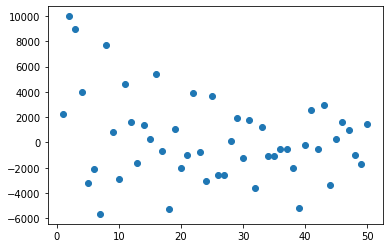

In [45]:

# 21 - Make a scatter plot with sample size on the x-axs and  mean difference on the y-axis
# Observe as the sample size increases, the sample means converge to the population mean.
# Make sure you make the plot large enough
plt.scatter(x=sample_sizes,y=means_diff)


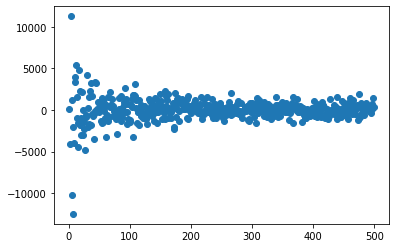

In [50]:
# 22 - repeat 18 to 21 by replacing 50 with a larger number. For example, 300, or even 1000.
# and see how the plot looks.
sample_sizes=list(range(1,500))
means_diff=[]
for x in sample_sizes:
  means_diff.append(diff_function(x, df))

plt.scatter(x=sample_sizes,y=means_diff)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c26753ea-08b0-439b-b148-83498e8deadd' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>